In [79]:
import pandas as pd
import numpy as np

#Visualization imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [80]:
raw_data = pd.read_csv('Bias_correction_ucl - Copy.csv', nrows=5000)
data = raw_data.round(decimals=3)
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1,2013-06-30,28.7,21.4,58.256,91.116,28.074,23.007,6.819,69.452,...,0.0,0.0,0.0,37.605,126.991,212.335,2.785,5992.896,29.1,21.2
1,2,2013-06-30,31.9,21.6,52.263,90.605,29.851,24.035,5.692,51.937,...,0.0,0.0,0.0,37.605,127.032,44.762,0.514,5869.312,30.5,22.5
2,3,2013-06-30,31.6,23.3,48.690,83.974,30.091,24.566,6.138,20.573,...,0.0,0.0,0.0,37.578,127.058,33.307,0.266,5863.556,31.1,23.9
3,4,2013-06-30,32.0,23.4,58.240,96.484,29.705,23.326,5.650,65.727,...,0.0,0.0,0.0,37.645,127.022,45.716,2.535,5856.965,31.7,24.3
4,5,2013-06-30,31.4,21.9,56.174,90.155,29.114,23.486,5.735,107.966,...,0.0,0.0,0.0,37.551,127.135,35.038,0.505,5859.552,31.2,22.5


In [81]:
x = data[['station',  'Present_Tmin', 'LDAPS_RHmin','LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS','LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon','DEM', 'Slope', 'Next_Tmax', 'Next_Tmin']].values
y = data['Present_Tmax'].values

In [82]:
#convert y values to categorical values
from sklearn import preprocessing
from sklearn import utils

lab = preprocessing.LabelEncoder()
y = lab.fit_transform(y)

from sklearn.model_selection import train_test_split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3, random_state=0)

In [83]:
#Train the SVM model
from sklearn.svm import SVC
model = SVC()
model.fit(x_training_data, y_training_data)

SVC()

In [84]:
#Make predictions with the model
predictions = model.predict(x_test_data)

Text(0, 0.5, 'Predicted')

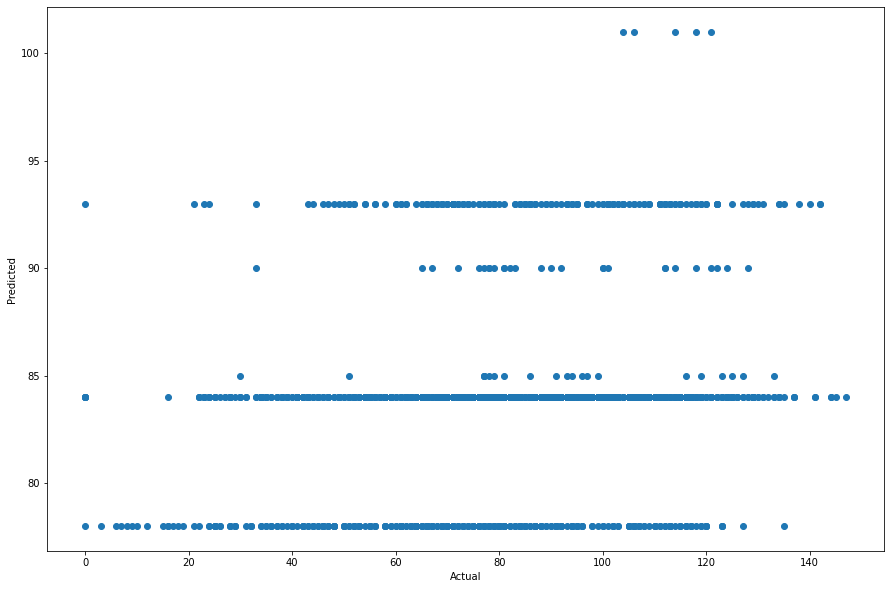

In [85]:
plt.figure(figsize=(15,10))
plt.scatter(y_test_data, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')


In [86]:
#Measure the performance of our model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [87]:
set(y_test_data) - set(predictions)
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

print(classification_report(y_test_data, predictions))
print(confusion_matrix(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         4
          23       0.00      0.00      0.00         5
          24       0.00      0.00      0.00         7
          25       0.00    

C:\Users\Harnoor Singh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harnoor Singh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harnoor Singh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.